In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose the ZIP file

Saving brain_tumor_classification.zip to brain_tumor_classification.zip


In [ ]:
import zipfile
import os
zip_ref = zipfile.ZipFile("brain_tumor_classification.zip", 'r')
zip_ref.extractall("brain_tumor_classification")
zip_ref.close()

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [ ]:
IMG_SIZE = 130
DATA_DIR = "/content/brain_tumor_classification/Training"


In [ ]:
data = []
labels = []
classes = os.listdir(DATA_DIR)

for class_name in classes:
    path = os.path.join(DATA_DIR, class_name)
    for img_file in os.listdir(path):
        try:
            img_path = os.path.join(path, img_file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            data.append(image)
            labels.append(class_name)
        except Exception as e:
            print(f"Failed on {img_file}: {e}")


In [ ]:
X = np.array(data) / 255.0
y = np.array(labels)

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert class names to numbers
print(le.classes_)  # e.g., ['glioma', 'meningioma', 'pituitary']


['glioma' 'meningioma' 'notumor' 'pituitary']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [ ]:
#ml model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Flatten the images for ML model
X_flat = X.reshape(len(X), -1)

# Train-test split
X_train_flat, X_test_flat, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_flat, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_flat)




ML Accuracy: 0.9345195729537367
ML Classification Report:
               precision    recall  f1-score   support

      glioma       0.98      0.88      0.93       330
  meningioma       0.86      0.88      0.87       321
     notumor       0.97      0.99      0.98       426
   pituitary       0.92      0.97      0.94       328

    accuracy                           0.93      1405
   macro avg       0.93      0.93      0.93      1405
weighted avg       0.94      0.93      0.93      1405



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict
y_pred_rf = rf_model.predict(X_test_flat)

# Evaluation
print("ML Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Save for plotting
report_ml = classification_report(y_test, y_pred_rf, target_names=le.classes_, output_dict=True)
cm_ml = confusion_matrix(y_test, y_pred_rf)


ML Accuracy: 0.9345195729537367
Classification Report:
               precision    recall  f1-score   support

      glioma       0.98      0.88      0.93       330
  meningioma       0.86      0.88      0.87       321
     notumor       0.97      0.99      0.98       426
   pituitary       0.92      0.97      0.94       328

    accuracy                           0.93      1405
   macro avg       0.93      0.93      0.93      1405
weighted avg       0.94      0.93      0.93      1405

Confusion Matrix:
 [[292  36   0   2]
 [  6 281  10  24]
 [  1   1 423   1]
 [  0   8   3 317]]


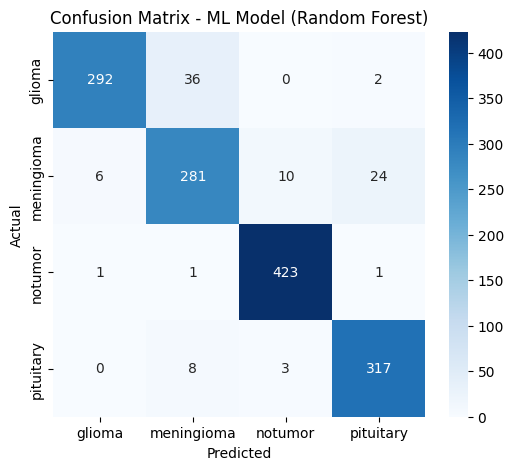

Classification Report - ML Model
              precision    recall  f1-score   support

      glioma       0.98      0.88      0.93       330
  meningioma       0.86      0.88      0.87       321
     notumor       0.97      0.99      0.98       426
   pituitary       0.92      0.97      0.94       328

    accuracy                           0.93      1405
   macro avg       0.93      0.93      0.93      1405
weighted avg       0.94      0.93      0.93      1405



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions using your trained Random Forest model
y_pred_rf = rf_model.predict(X_test_flat)

# Confusion Matrix
cm_ml = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ml, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - ML Model (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report as Text
print("Classification Report - ML Model")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Save the report dictionary for metric comparison
report_ml = classification_report(y_test, y_pred_rf, target_names=le.classes_, output_dict=True)


In [ ]:
# bar visualizzation
import numpy as np

labels = list(le.classes_)
metrics = ['precision', 'recall', 'f1-score']
x = np.arange(len(labels))  # label positions
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    scores = [report_ml[label][metric] for label in labels]
    ax.bar(x + i * width, scores, width, label=metric.capitalize())

ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Classification Report - ML Model')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0, 1.05)
plt.show()


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Convert labels to one-hot encoding for categorical crossentropy
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train_cat.shape[1], activation='softmax')  # Output layer for multi-class
])

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.5219 - loss: 1.0686 - val_accuracy: 0.8292 - val_loss: 0.4881
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.7979 - loss: 0.5176 - val_accuracy: 0.8630 - val_loss: 0.3812
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.8400 - loss: 0.4197 - val_accuracy: 0.8826 - val_loss: 0.3375
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.8826 - loss: 0.3027 - val_accuracy: 0.8915 - val_loss: 0.3016
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9127 - loss: 0.2353 - val_accuracy: 0.9146 - val_loss: 0.2397
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.9292 - loss: 0.1915 - val_accuracy: 0.9146 - val_loss: 0.2771
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9413 - loss: 0.1589 - val_accuracy: 0.9235 - val_loss: 0.2738
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.9507 - loss: 0.1229 - val_accu

In [ ]:
# Predict probabilities
y_pred_dl_prob = model.predict(X_test)

# Convert to class labels
y_pred_dl = np.argmax(y_pred_dl_prob, axis=1)

# Evaluation
print("DL Model Accuracy:", accuracy_score(y_test, y_pred_dl))
print("Classification Report:\n", classification_report(y_test, y_pred_dl, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dl))


44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 471ms/step
DL Model Accuracy: 0.9380782918149466
Classification Report:
               precision    recall  f1-score   support

      glioma       0.95      0.91      0.93       324
  meningioma       0.87      0.89      0.88       329
     notumor       0.96      0.96      0.96       400
   pituitary       0.96      0.98      0.97       352

    accuracy                           0.94      1405
   macro avg       0.94      0.94      0.94      1405
weighted avg       0.94      0.94      0.94      1405

Confusion Matrix:
 [[295  29   0   0]
 [ 12 294  13  10]
 [  2  10 385   3]
 [  1   4   3 344]]


44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 442ms/step


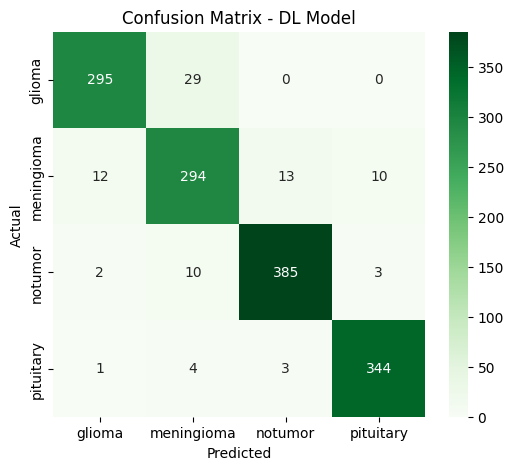

Classification Report - DL Model
              precision    recall  f1-score   support

      glioma       0.95      0.91      0.93       324
  meningioma       0.87      0.89      0.88       329
     notumor       0.96      0.96      0.96       400
   pituitary       0.96      0.98      0.97       352

    accuracy                           0.94      1405
   macro avg       0.94      0.94      0.94      1405
weighted avg       0.94      0.94      0.94      1405



In [ ]:
# Predictions
import seaborn as sns

y_pred_dl_prob = model.predict(X_test)
y_pred_dl = np.argmax(y_pred_dl_prob, axis=1)

# Confusion Matrix
cm_dl = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - DL Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report as Text
print("Classification Report - DL Model")
print(classification_report(y_test, y_pred_dl, target_names=le.classes_))


44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 327ms/step


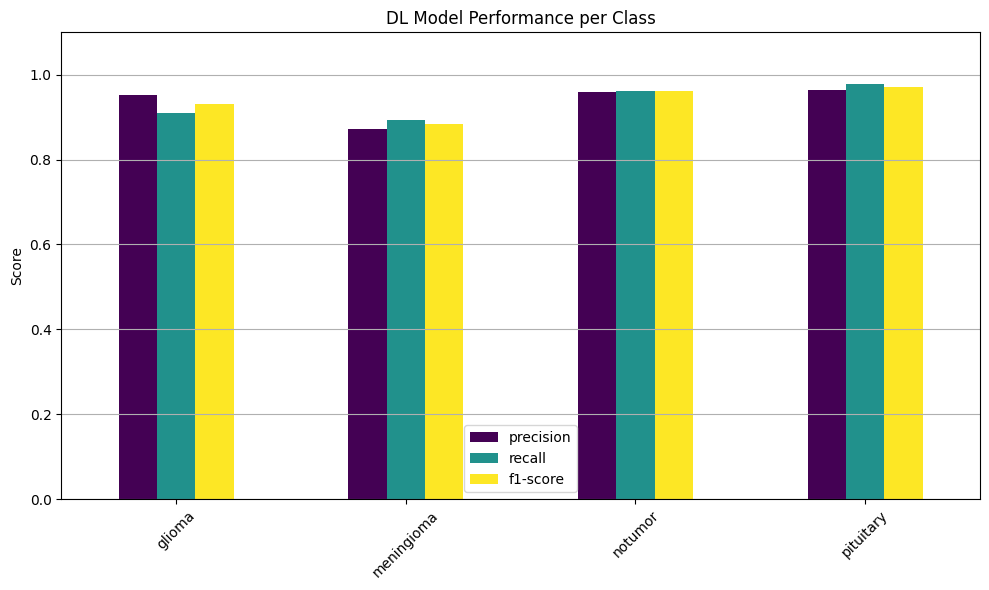

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Generate predictions
y_pred_dl_prob = model.predict(X_test)
y_pred_dl = np.argmax(y_pred_dl_prob, axis=1)

# Get classification report as dict
report_dl = classification_report(y_test, y_pred_dl, target_names=le.classes_, output_dict=True)

# Convert to DataFrame
df_dl_report = pd.DataFrame(report_dl).transpose()
df_dl_report = df_dl_report.iloc[:-3]  # Remove 'accuracy', 'macro avg', 'weighted avg'

# Plotting
df_dl_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("DL Model Performance per Class")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Step 1: Predict on test data
y_pred_dl_prob = model.predict(X_test)              # Probabilities
y_pred_dl = np.argmax(y_pred_dl_prob, axis=1)       # Convert to class indices

# Step 2: Convert y_test_cat back to class indices for comparison
y_test_int = np.argmax(y_test_cat, axis=1)          # Reverse one-hot to int

# Step 3: Classification report
report_dl = classification_report(
    y_test_int, y_pred_dl, target_names=le.classes_, output_dict=True
)

# Optional: Confusion Matrix
cm_dl = confusion_matrix(y_test_int, y_pred_dl)


44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 376ms/step


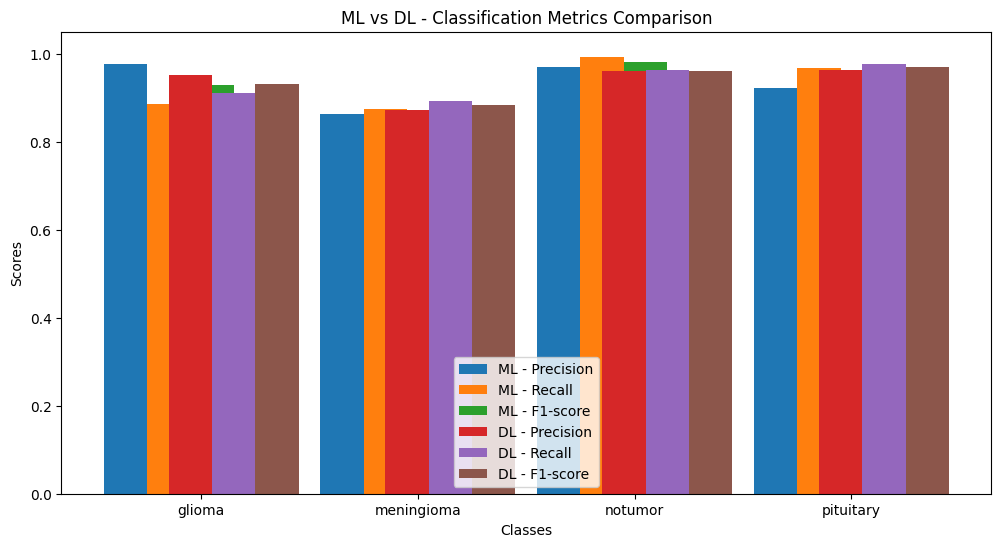

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['precision', 'recall', 'f1-score']
x = np.arange(len(le.classes_))  # label positions
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# ML Bars
for i, metric in enumerate(metrics):
    scores_ml = [report_ml[label][metric] for label in le.classes_]
    ax.bar(x + i * width - 0.15, scores_ml, width, label=f'ML - {metric.capitalize()}')

# DL Bars
for i, metric in enumerate(metrics):
    scores_dl = [report_dl[label][metric] for label in le.classes_]
    ax.bar(x + i * width + 0.15, scores_dl, width, label=f'DL - {metric.capitalize()}')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('ML vs DL - Classification Metrics Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(le.classes_)
ax.legend()
plt.ylim(0, 1.05)
plt.show()
